# CMPE 403 - Fundamentals of Image Processing - Fall 2020 - Project

BARIŞ ÇAL - 116200045

**I had use some ready code pairs from internet, or my old worksheets. I gave the source each of them. I generally used openCV and scipy libraries.

In [88]:
import cv2
print(f'openCV: {cv2.__version__}')
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt
import pywt
from skimage.util import random_noise
from scipy import ndimage, misc

openCV: 4.4.0


# Task 1 (25 points): Image denoising

1. Read the original image rontgen.jpg into variable ‘OrigR’; display the original image

In [89]:
OrigR = cv2.imread('rontgen.png') #read image from file
cv2.imshow('', OrigR)
cv2.waitKey(0)
cv2.destroyAllWindows()

I read the with openCV.

2. (2 points) Modify the original image by adding Gaussian noise (sigma= 14 and 27) and
Salt&Pepper noise (probability salt= 0.7%); call the noisy images ‘RG14’,’RG27’, ‘SP’

In [90]:
def add_gaussian_noise(image_in, noise_sigma):
    temp_image = np.float64(np.copy(image_in))

    h = temp_image.shape[0]
    w = temp_image.shape[1]
    noise = np.random.randn(h, w) * noise_sigma

    noisy_image = np.zeros(temp_image.shape, np.float64)
    if len(temp_image.shape) == 2:
        noisy_image = temp_image + noise
    else:
        noisy_image[:,:,0] = temp_image[:,:,0] + noise
        noisy_image[:,:,1] = temp_image[:,:,1] + noise
        noisy_image[:,:,2] = temp_image[:,:,2] + noise

    """
    print('min,max = ', np.min(noisy_image), np.max(noisy_image))
    print('type = ', type(noisy_image[0][0][0]))
    """

    return noisy_image

def convert_to_uint8(image_in):
    temp_image = np.float64(np.copy(image_in))
    cv2.normalize(temp_image, temp_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)

    return temp_image.astype(np.uint8)

http://www.magikcode.com/?p=240

In [91]:
def SaltAndPepper_Noise(image,prob):
    '''
    method takes image and prob values which is between 0 and 1.
    '''
    output = np.zeros(image.shape,np.uint8)#output will be uint8 type
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()  #adding random noise to image
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [92]:
RG14 = add_gaussian_noise(OrigR, 14)
convert_to_uint8(RG14)
cv2.imshow('', RG14)
cv2.waitKey(0)
cv2.destroyAllWindows()

Gaussian Noise with sigma 14.

In [93]:
RG27 = add_gaussian_noise(OrigR, 27)
convert_to_uint8(RG27)
cv2.imshow('', RG27)
cv2.waitKey(0)
cv2.destroyAllWindows()

Gaussian Noise with sigma 27.

In [94]:
SP = SaltAndPepper_Noise(OrigR, 0.007)
cv2.imshow('', SP)
cv2.waitKey(0)
cv2.destroyAllWindows()

Salt and Pepper Noise with probability 0.7%.

3. (3 points) Calculate the Signal to Noise (SNR) ratio of the corrupted images, ‘RG14’, ‘RG27’,
‘SP’

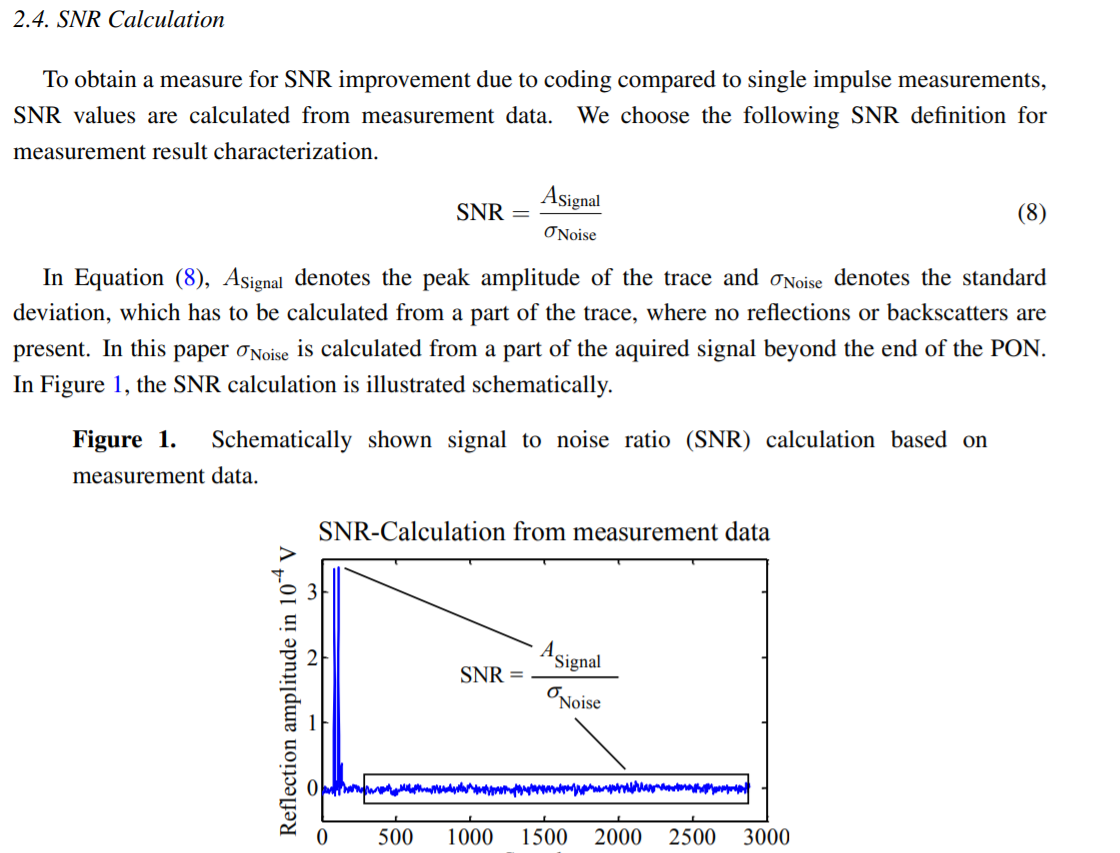

Researchgate link: https://www.researchgate.net/publication/294426079_Signal_to_Noise_Ratio_SNR_Enhancement_Comparison_of_Impulse-_Coding-_and_Novel_Linear-Frequency-Chirp-Based_Optical_Time_Domain_Reflectometry_OTDR_for_Passive_Optical_Network_PON_Monitoring_Based_on_U

Citation:

@article{article,

author = {Bentz, Christopher and Baudzus, Lars and Krummrich, Peter},

year = {2014},

month = {03},

pages = {33-46},

title = {Signal to Noise Ratio (SNR) Enhancement Comparison of Impulse-, Coding- and Novel Linear-Frequency-Chirp-Based Optical Time Domain Reflectometry (OTDR) for Passive Optical Network (PON) Monitoring Based on Unique Combinations of Wavelength Selective Mirrors},

volume = {1},

journal = {Photonics},

doi = {10.3390/photonics1010033}
}

In [95]:
def signaltonoise(a, axis=0, ddof=0):
    """
    The signal-to-noise ratio of the input data.
    Returns the signal-to-noise ratio of `a`, here defined as the mean
    divided by the standard deviation.
    Parameters
    ----------
    a : array_like
        An array_like object containing the sample data.
    axis : int or None, optional
        Axis along which to operate. Default is 0. If None, compute over
        the whole array `a`.
    ddof : int, optional
        Degrees of freedom correction for standard deviation. Default is 0.
    Returns
    -------
    s2n : ndarray
        The mean to standard deviation ratio(s) along `axis`, or 0 where the
        standard deviation is 0.
    """
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [96]:
signaltonoise(RG14)

array([[0.71448142, 0.71448142, 0.71448142],
       [0.72781769, 0.72781769, 0.72781769],
       [0.73157562, 0.73157562, 0.73157562],
       ...,
       [0.93818983, 0.93818983, 0.93818983],
       [0.93928292, 0.93928292, 0.93928292],
       [0.90180995, 0.90180995, 0.90180995]])

In [97]:
signaltonoise(RG27)

array([[0.66186927, 0.66186927, 0.66186927],
       [0.66280255, 0.66280255, 0.66280255],
       [0.67086551, 0.67086551, 0.67086551],
       ...,
       [0.9081271 , 0.9081271 , 0.9081271 ],
       [0.92313223, 0.92313223, 0.92313223],
       [0.843951  , 0.843951  , 0.843951  ]])

In [98]:
signaltonoise(SP)

array([[0.73340465, 0.73340465, 0.73340465],
       [0.73400354, 0.73400354, 0.73400354],
       [0.73588599, 0.73588599, 0.73588599],
       ...,
       [0.93375472, 0.93375472, 0.93375472],
       [0.93855246, 0.93855246, 0.93855246],
       [0.90450357, 0.90450357, 0.90450357]])

I took this code from here:

https://github.com/scipy/scipy/blob/v0.16.0/scipy/stats/stats.py#L1963

SciPy: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.signaltonoise.html

I made some researches and I added all links.

4. Clean ‘R*’ and ‘SP’ images using:

a. (2+2+2 points) Gaussian filters of size 3×3, 5×5 and 7×7

b. (2+2+2 points) Median filters of size 3×3, 5×5 and 7×7

# 4 - a

In [99]:
RG14_gaussian_3x3 = cv2.GaussianBlur(RG14,(3,3),0)

In [100]:
RG14_gaussian_5x5 = cv2.GaussianBlur(RG14,(5,5),0)

In [101]:
RG14_gaussian_7x7 = cv2.GaussianBlur(RG14,(7,7),0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'RG14_gaussian_7x7')

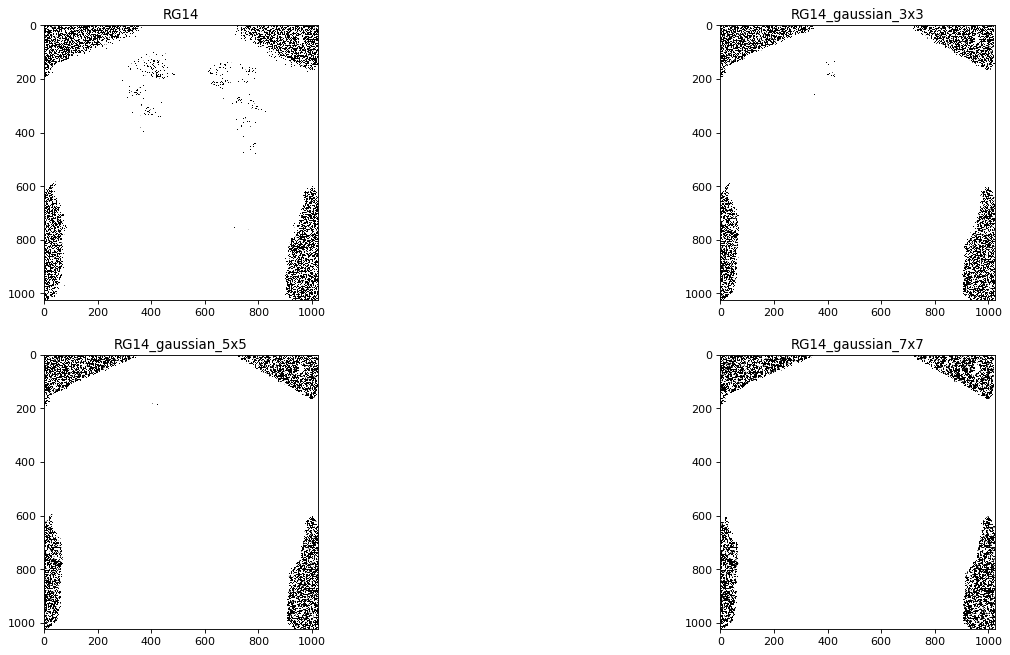

In [102]:
plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='k')
#plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.imshow(RG14)
plt.gca().set_title('RG14')

plt.subplot(2,2,2)
plt.imshow(RG14_gaussian_3x3)
plt.gca().set_title('RG14_gaussian_3x3')

plt.subplot(2,2,3)
plt.imshow(RG14_gaussian_5x5)
plt.gca().set_title('RG14_gaussian_5x5')

plt.subplot(2,2,4)
plt.imshow(RG14_gaussian_7x7)
plt.gca().set_title('RG14_gaussian_7x7')

Gaussian Filter to image RG14. I plotted them inside a plot.

In [103]:
RG27_gaussian_3x3 = cv2.GaussianBlur(RG27,(3,3),0)

In [104]:
RG27_gaussian_5x5 = cv2.GaussianBlur(RG27,(5,5),0)

In [105]:
RG27_gaussian_7x7 = cv2.GaussianBlur(RG27,(7,7),0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'RG27_gaussian_7x7')

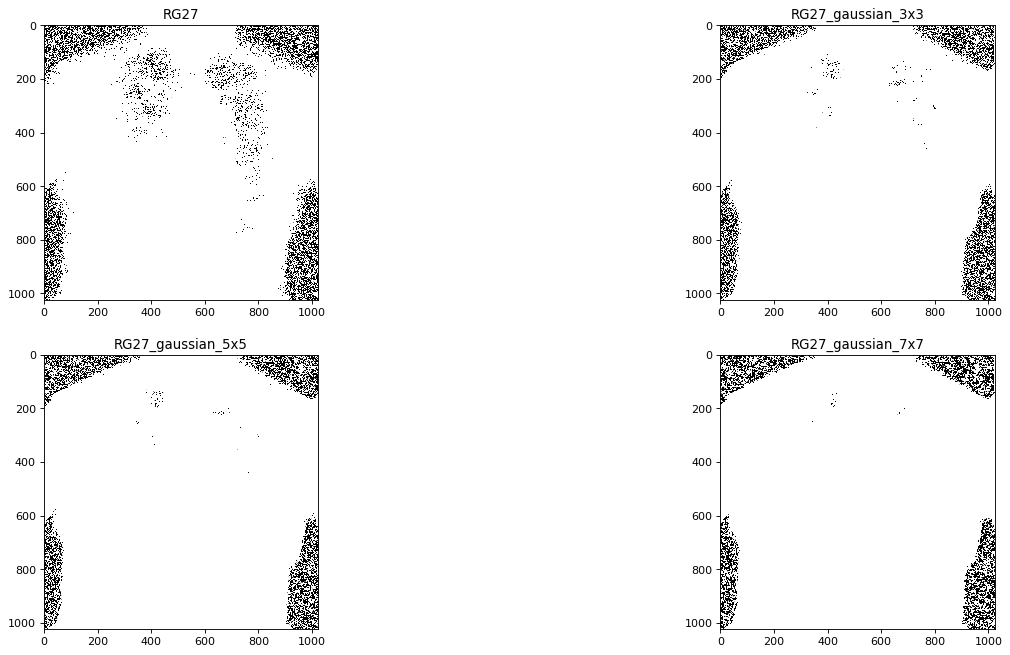

In [106]:
plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='k')
#plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.imshow(RG27)
plt.gca().set_title('RG27')

plt.subplot(2,2,2)
plt.imshow(RG27_gaussian_3x3)
plt.gca().set_title('RG27_gaussian_3x3')

plt.subplot(2,2,3)
plt.imshow(RG27_gaussian_5x5)
plt.gca().set_title('RG27_gaussian_5x5')

plt.subplot(2,2,4)
plt.imshow(RG27_gaussian_7x7)
plt.gca().set_title('RG27_gaussian_7x7')

Gaussian Filter to image RG27. I plotted them inside a plot.

In [107]:
SP_gaussian_3x3 = cv2.GaussianBlur(SP,(3,3),0)

In [108]:
SP_gaussian_5x5 = cv2.GaussianBlur(SP,(5,5),0)

In [109]:
SP_gaussian_7x7 = cv2.GaussianBlur(SP,(7,7),0)

Text(0.5, 1.0, 'SP_gaussian_7x7')

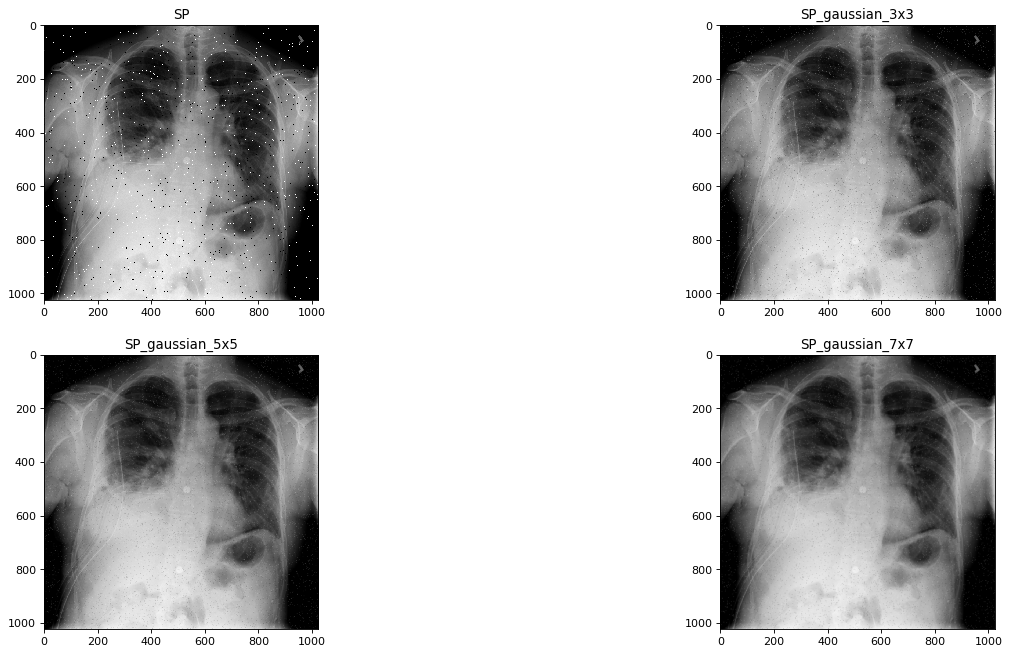

In [110]:
plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='k')
#plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.imshow(SP)
plt.gca().set_title('SP')

plt.subplot(2,2,2)
plt.imshow(SP_gaussian_3x3)
plt.gca().set_title('SP_gaussian_3x3')

plt.subplot(2,2,3)
plt.imshow(SP_gaussian_5x5)
plt.gca().set_title('SP_gaussian_5x5')

plt.subplot(2,2,4)
plt.imshow(SP_gaussian_7x7)
plt.gca().set_title('SP_gaussian_7x7')

Salt and Pepper Filter to SP. I plotted all pictures.

# 4 - b

In [111]:
#Source code
def median_filter(input, size=None, footprint=None, output=None,
                  mode="reflect", cval=0.0, origin=0):
    """
    Calculate a multidimensional median filter.

    Parameters
    ----------
    %(input)s
    %(size_foot)s
    %(output)s
    %(mode)s
    %(cval)s
    %(origin_multiple)s

    Returns
    -------
    median_filter : ndarray
        Filtered array. Has the same shape as `input`.

    Examples
    --------
    >>> from scipy import ndimage, misc
    >>> import matplotlib.pyplot as plt
    >>> fig = plt.figure()
    >>> plt.gray()  # show the filtered result in grayscale
    >>> ax1 = fig.add_subplot(121)  # left side
    >>> ax2 = fig.add_subplot(122)  # right side
    >>> ascent = misc.ascent()
    >>> result = ndimage.median_filter(ascent, size=20)
    >>> ax1.imshow(ascent)
    >>> ax2.imshow(result)
    >>> plt.show()
    """
    return _rank_filter(input, 0, size, footprint, output, mode, cval,
                        origin, 'median')

Source code: https://github.com/scipy/scipy/blob/v1.5.4/scipy/ndimage/filters.py#L1287-L1322

SciPy link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html

In [25]:
RG14_median_3x3 = ndimage.median_filter(RG14, size=3)

In [26]:
RG14_median_5x5 = ndimage.median_filter(RG14, size=5)

In [27]:
RG14_median_7x7 = ndimage.median_filter(RG14, size=7)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'RG14_median_7x7')

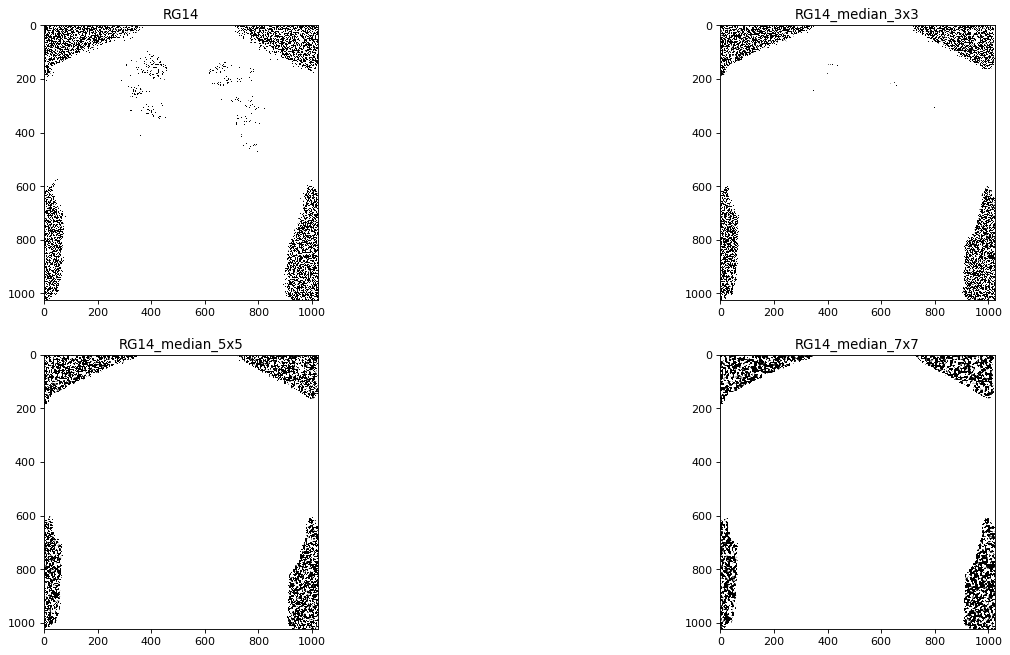

In [28]:
plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='k')
#plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.imshow(RG14)
plt.gca().set_title('RG14')

plt.subplot(2,2,2)
plt.imshow(RG14_median_3x3)
plt.gca().set_title('RG14_median_3x3')

plt.subplot(2,2,3)
plt.imshow(RG14_median_5x5)
plt.gca().set_title('RG14_median_5x5')

plt.subplot(2,2,4)
plt.imshow(RG14_median_7x7)
plt.gca().set_title('RG14_median_7x7')

In [29]:
RG27_median_3x3 = ndimage.median_filter(RG27, size=3)

In [30]:
RG27_median_5x5 = ndimage.median_filter(RG27, size=3)

In [31]:
RG27_median_7x7 = ndimage.median_filter(RG27, size=3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'RG27_median_7x7')

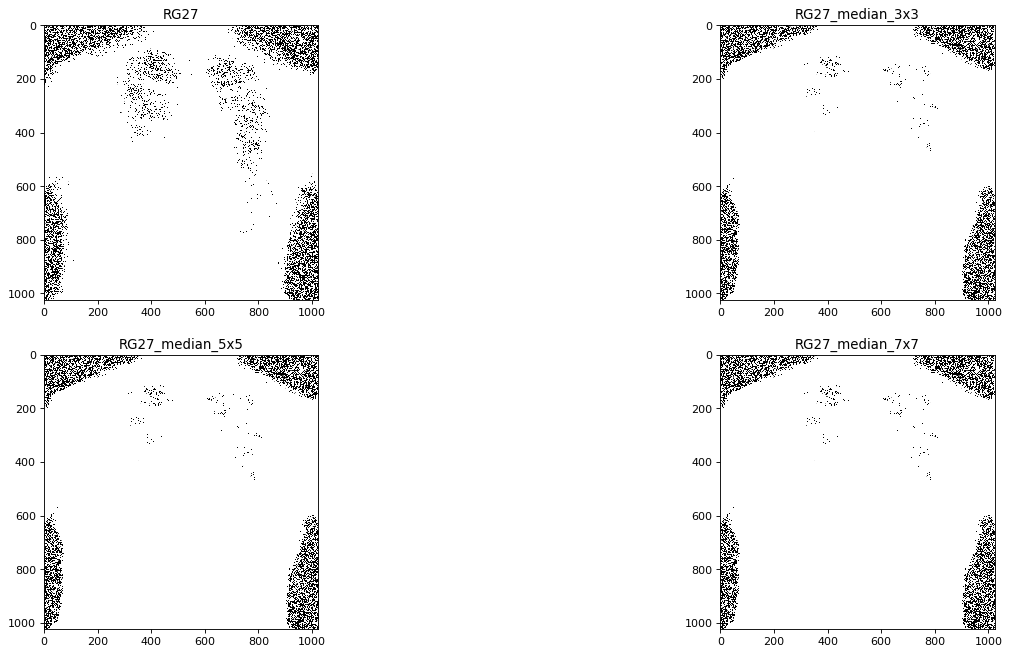

In [32]:
plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='k')
#plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.imshow(RG27)
plt.gca().set_title('RG27')

plt.subplot(2,2,2)
plt.imshow(RG27_median_3x3)
plt.gca().set_title('RG27_median_3x3')

plt.subplot(2,2,3)
plt.imshow(RG27_median_5x5)
plt.gca().set_title('RG27_median_5x5')

plt.subplot(2,2,4)
plt.imshow(RG27_median_7x7)
plt.gca().set_title('RG27_median_7x7')

!! NOTE !!

I tried to use medianBlur function from openCV but I could not, I do not know why.

-->cv2.medianBlur(RG14,3)  Does not worked.


In [33]:
SP_median_3x3 = cv2.medianBlur(SP,3)

In [34]:
SP_median_5x5 = cv2.medianBlur(SP,5)

In [35]:
SP_median_7x7 = cv2.medianBlur(SP,7)

Text(0.5, 1.0, 'SP_median_7x7')

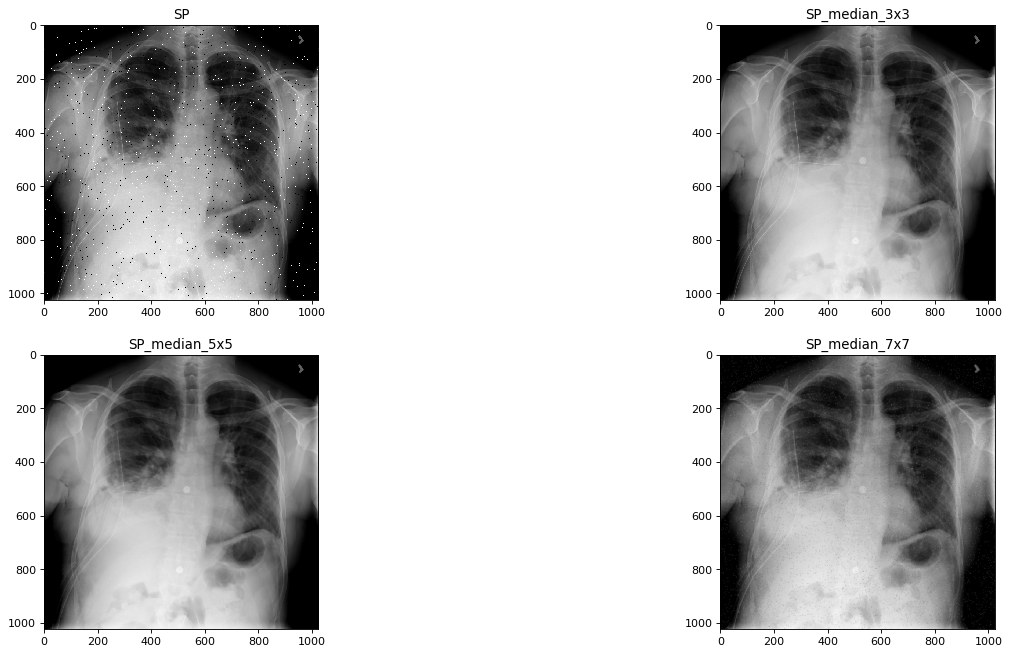

In [36]:
plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='k')
#plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.imshow(SP)
plt.gca().set_title('SP')

plt.subplot(2,2,2)
plt.imshow(SP_median_3x3)
plt.gca().set_title('SP_median_3x3')

plt.subplot(2,2,3)
plt.imshow(SP_median_5x5)
plt.gca().set_title('SP_median_5x5')

plt.subplot(2,2,4)
plt.imshow(SP_gaussian_7x7)
plt.gca().set_title('SP_median_7x7')

Median Filter to SP images. I plotted each of them.

5. (6 points) For each of the restored images calculate signal to noise ratio (SNR) values

# 5 for 4 - a

In [37]:
signaltonoise(RG14_gaussian_3x3)

array([[0.73871919, 0.73871919, 0.73871919],
       [0.73554811, 0.73554811, 0.73554811],
       [0.73534503, 0.73534503, 0.73534503],
       ...,
       [0.92863629, 0.92863629, 0.92863629],
       [0.93660849, 0.93660849, 0.93660849],
       [0.93027995, 0.93027995, 0.93027995]])

In [38]:
signaltonoise(RG14_gaussian_5x5)

array([[0.73877455, 0.73877455, 0.73877455],
       [0.73833702, 0.73833702, 0.73833702],
       [0.73929969, 0.73929969, 0.73929969],
       ...,
       [0.92415008, 0.92415008, 0.92415008],
       [0.93373724, 0.93373724, 0.93373724],
       [0.93413051, 0.93413051, 0.93413051]])

In [39]:
signaltonoise(RG14_gaussian_7x7)

array([[0.73969868, 0.73969868, 0.73969868],
       [0.74006906, 0.74006906, 0.74006906],
       [0.74182256, 0.74182256, 0.74182256],
       ...,
       [0.92003123, 0.92003123, 0.92003123],
       [0.93034665, 0.93034665, 0.93034665],
       [0.93330603, 0.93330603, 0.93330603]])

In [40]:
signaltonoise(RG27_gaussian_3x3)

array([[0.73335874, 0.73335874, 0.73335874],
       [0.73997252, 0.73997252, 0.73997252],
       [0.74358483, 0.74358483, 0.74358483],
       ...,
       [0.92572843, 0.92572843, 0.92572843],
       [0.93112005, 0.93112005, 0.93112005],
       [0.92500314, 0.92500314, 0.92500314]])

In [41]:
signaltonoise(RG27_gaussian_5x5)

array([[0.74221325, 0.74221325, 0.74221325],
       [0.7461549 , 0.7461549 , 0.7461549 ],
       [0.74745245, 0.74745245, 0.74745245],
       ...,
       [0.92357202, 0.92357202, 0.92357202],
       [0.93079435, 0.93079435, 0.93079435],
       [0.93030446, 0.93030446, 0.93030446]])

In [42]:
signaltonoise(RG27_gaussian_7x7)

array([[0.74845747, 0.74845747, 0.74845747],
       [0.74896469, 0.74896469, 0.74896469],
       [0.74899315, 0.74899315, 0.74899315],
       ...,
       [0.9203955 , 0.9203955 , 0.9203955 ],
       [0.92901599, 0.92901599, 0.92901599],
       [0.93128518, 0.93128518, 0.93128518]])

In [43]:
signaltonoise(SP_gaussian_3x3)

array([[0.78144458, 0.78144458, 0.78144458],
       [0.77703806, 0.77703806, 0.77703806],
       [0.76410329, 0.76410329, 0.76410329],
       ...,
       [0.95697588, 0.95697588, 0.95697588],
       [0.96353036, 0.96353036, 0.96353036],
       [0.96185114, 0.96185114, 0.96185114]])

In [44]:
signaltonoise(SP_gaussian_5x5)

array([[0.78195692, 0.78195692, 0.78195692],
       [0.77799117, 0.77799117, 0.77799117],
       [0.76932033, 0.76932033, 0.76932033],
       ...,
       [0.95444756, 0.95444756, 0.95444756],
       [0.96304622, 0.96304622, 0.96304622],
       [0.96397682, 0.96397682, 0.96397682]])

In [45]:
signaltonoise(SP_gaussian_7x7)

array([[0.78007408, 0.78007408, 0.78007408],
       [0.77806544, 0.77806544, 0.77806544],
       [0.77444997, 0.77444997, 0.77444997],
       ...,
       [0.95025574, 0.95025574, 0.95025574],
       [0.9607946 , 0.9607946 , 0.9607946 ],
       [0.96395932, 0.96395932, 0.96395932]])

Signal to Noise Ratio values for restored images.

# 5 for 4 - b

In [46]:
signaltonoise(RG14_median_3x3)

array([[0.74041059, 0.74041059, 0.74041059],
       [0.73424216, 0.73424216, 0.73424216],
       [0.7367607 , 0.7367607 , 0.7367607 ],
       ...,
       [0.92590725, 0.92590725, 0.92590725],
       [0.92551298, 0.92551298, 0.92551298],
       [0.9283351 , 0.9283351 , 0.9283351 ]])

In [47]:
signaltonoise(RG14_median_5x5)

array([[0.7360184 , 0.7360184 , 0.7360184 ],
       [0.74617021, 0.74617021, 0.74617021],
       [0.7420906 , 0.7420906 , 0.7420906 ],
       ...,
       [0.91018794, 0.91018794, 0.91018794],
       [0.91550819, 0.91550819, 0.91550819],
       [0.92505927, 0.92505927, 0.92505927]])

In [48]:
signaltonoise(RG14_median_7x7)

array([[0.74143607, 0.74143607, 0.74143607],
       [0.74140193, 0.74140193, 0.74140193],
       [0.7485955 , 0.7485955 , 0.7485955 ],
       ...,
       [0.90348261, 0.90348261, 0.90348261],
       [0.91429181, 0.91429181, 0.91429181],
       [0.92228812, 0.92228812, 0.92228812]])

In [49]:
signaltonoise(RG14_median_3x3)

array([[0.74041059, 0.74041059, 0.74041059],
       [0.73424216, 0.73424216, 0.73424216],
       [0.7367607 , 0.7367607 , 0.7367607 ],
       ...,
       [0.92590725, 0.92590725, 0.92590725],
       [0.92551298, 0.92551298, 0.92551298],
       [0.9283351 , 0.9283351 , 0.9283351 ]])

In [50]:
signaltonoise(RG14_median_5x5)

array([[0.7360184 , 0.7360184 , 0.7360184 ],
       [0.74617021, 0.74617021, 0.74617021],
       [0.7420906 , 0.7420906 , 0.7420906 ],
       ...,
       [0.91018794, 0.91018794, 0.91018794],
       [0.91550819, 0.91550819, 0.91550819],
       [0.92505927, 0.92505927, 0.92505927]])

In [51]:
signaltonoise(RG14_median_7x7)

array([[0.74143607, 0.74143607, 0.74143607],
       [0.74140193, 0.74140193, 0.74140193],
       [0.7485955 , 0.7485955 , 0.7485955 ],
       ...,
       [0.90348261, 0.90348261, 0.90348261],
       [0.91429181, 0.91429181, 0.91429181],
       [0.92228812, 0.92228812, 0.92228812]])

In [52]:
signaltonoise(SP_median_3x3)

array([[0.75184416, 0.75184416, 0.75184416],
       [0.75093767, 0.75093767, 0.75093767],
       [0.75092787, 0.75092787, 0.75092787],
       ...,
       [0.93230877, 0.93230877, 0.93230877],
       [0.93194014, 0.93194014, 0.93194014],
       [0.91292102, 0.91292102, 0.91292102]])

In [53]:
signaltonoise(SP_median_5x5)

array([[0.75158184, 0.75158184, 0.75158184],
       [0.75147512, 0.75147512, 0.75147512],
       [0.75141791, 0.75141791, 0.75141791],
       ...,
       [0.90190671, 0.90190671, 0.90190671],
       [0.90251967, 0.90251967, 0.90251967],
       [0.91620875, 0.91620875, 0.91620875]])

In [54]:
signaltonoise(SP_median_7x7)

array([[0.75198143, 0.75198143, 0.75198143],
       [0.75176741, 0.75176741, 0.75176741],
       [0.75192466, 0.75192466, 0.75192466],
       ...,
       [0.89572505, 0.89572505, 0.89572505],
       [0.8967467 , 0.8967467 , 0.8967467 ],
       [0.91509507, 0.91509507, 0.91509507]])

# Task 2 (75 points): Image filtering and edges detection


1. Read the original image catLena.jpg into variable ‘OrigCLena’; display the original image


In [55]:
OrigCLena = cv2.imread('catLena.png') #read image from file
cv2.imshow('', OrigCLena)
cv2.waitKey(0)
cv2.destroyAllWindows()

Reading image from file.

2. (5 points) Create a box filter B3 of size 3 × 3

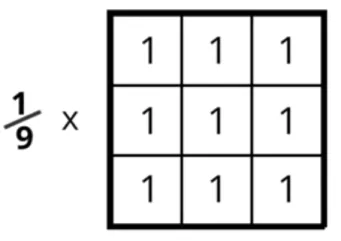

In [112]:
B3 = np.ones((3,3),np.float32)/9

https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html

3. (10 points) Create the blurred image ‘B3CLena’ (i.e. filter-convolve ‘OrigCLena’ with ‘B3’) and
display it nearby ‘OrigCLena’

I used three parameters. First is source, second depth, and last one is B3.

In [113]:
B3CLena = cv2.filter2D(OrigCLena,-1,B3)

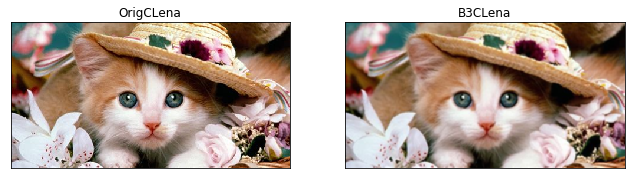

In [114]:
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(OrigCLena, cv2.COLOR_BGR2RGB)),plt.title('OrigCLena')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(B3CLena, cv2.COLOR_BGR2RGB)),plt.title('B3CLena')
plt.xticks([]), plt.yticks([])
plt.show()

4. Increase the size of mask B3 to 5 × 5; let us call this new mask B5

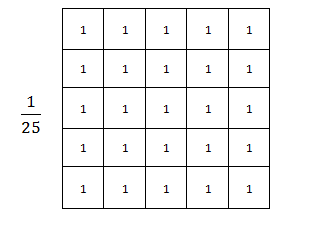

Box Filter 5x5.

In [115]:
B5 = np.ones((5,5),np.float32)/25
print(B5)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


5. (10 points) Create the blurred image ‘B5Lena’ (i.e. filter-convolve ‘OrigCLena’ with ‘B5’) and
display it nearby ‘OrigCLena’ and ‘B5CLena’. 

I used same method here for Box Filter.

In [116]:
B5CLena = cv2.filter2D(OrigCLena,-1,B5)

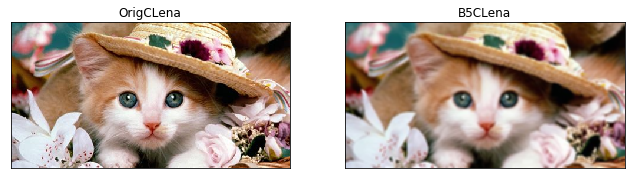

In [117]:
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(OrigCLena, cv2.COLOR_BGR2RGB)),plt.title('OrigCLena')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(B5CLena, cv2.COLOR_BGR2RGB)),plt.title('B5CLena')
plt.xticks([]), plt.yticks([])
plt.show()


6. Create the Laplacian 2D derivative Edge Detection (ED) mask of size 3 × 3: ED3=[0 1 0; 1 -4 1;
0 1 0]


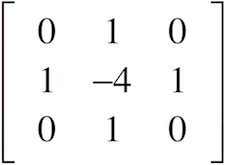

In [62]:
ED3 = np.array([[0,1,0],
               [1,-4,1],
               [0,1,0]])
print(ED3)

[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


7. (10 points) Create and display ‘ED3CLena’. Give the title ‘Edges in catLena with ED3’


Laplacian Edge Detection to image.

In [63]:
ED3CLena = cv2.Laplacian(OrigCLena, -1, ED3)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

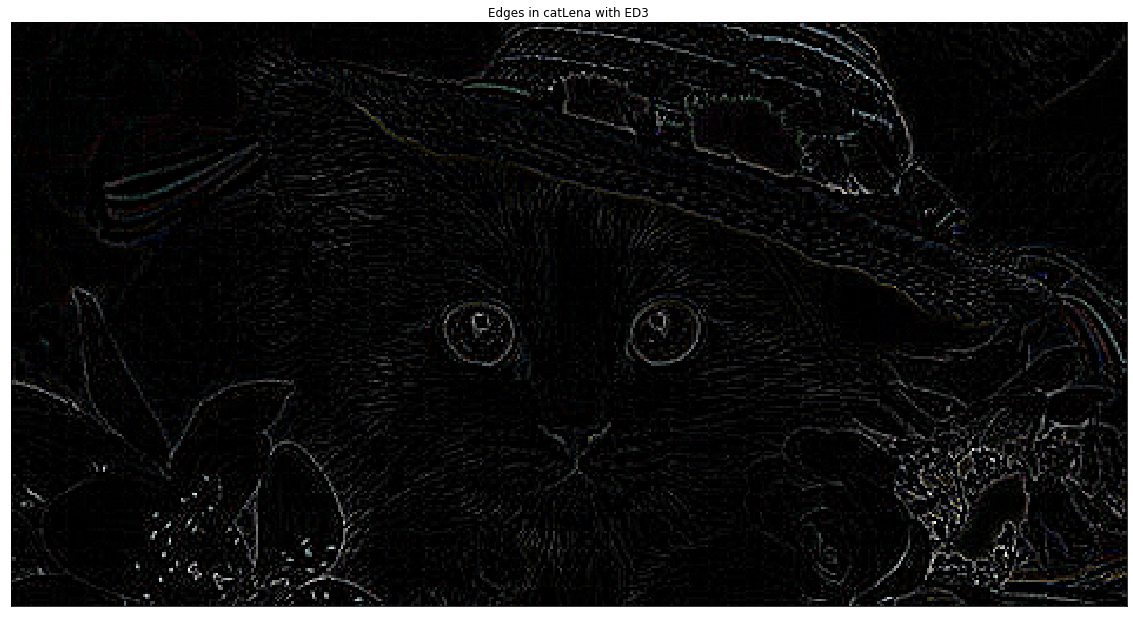

In [64]:
plt.figure(figsize=(44,24))
plt.subplot(121), plt.imshow(cv2.cvtColor(ED3CLena, cv2.COLOR_BGR2RGB)),plt.title('Edges in catLena with ED3')
plt.xticks([]), plt.yticks([])

8. Create the 1-st derivative Roberts edge detection masks: R_x=[1 0; 0 -1] and R_y=[0 -1; 1 0]


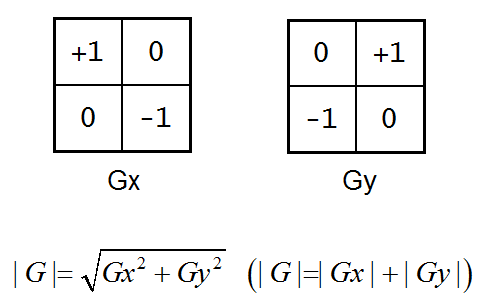

In [65]:
R_x = np.array([[1,0],
               [0,-1]])
R_y = np.array([[0,-1],
               [1,0]])
print(R_x)
print(R_y)

[[ 1  0]
 [ 0 -1]]
[[ 0 -1]
 [ 1  0]]


9. (5 points) Applying R_x to the blurred image ‘B3Lena’; give the title 'Vertical edges in catLena
with Roberts mask'

In [66]:
B3Lena_R_x = cv2.Laplacian(B3CLena, -1, R_x)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

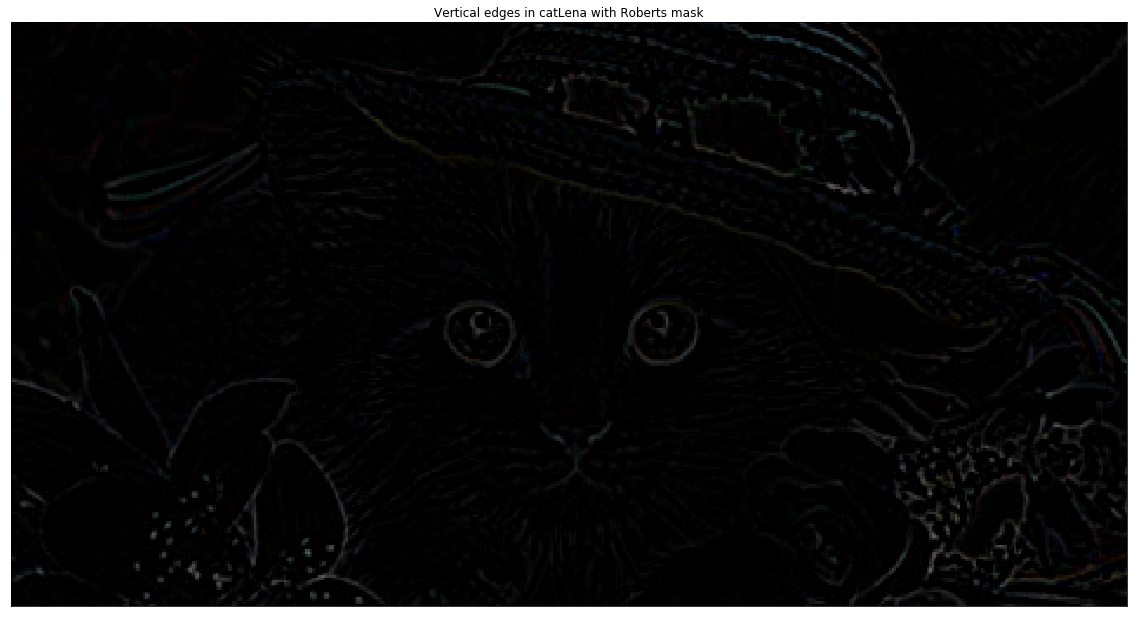

In [67]:
plt.figure(figsize=(44,24))
plt.subplot(121), plt.imshow(cv2.cvtColor(B3Lena_R_x, cv2.COLOR_BGR2RGB)),plt.title('Vertical edges in catLena with Roberts mask')
plt.xticks([]), plt.yticks([])

10. (5 points) Applying R_y to the blurred image ‘B3Lena’; give the title ‘Horizontal edges in
catLena with Roberts mask'

In [68]:
B3Lena_R_y = cv2.Laplacian(B3CLena, -1, R_y)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

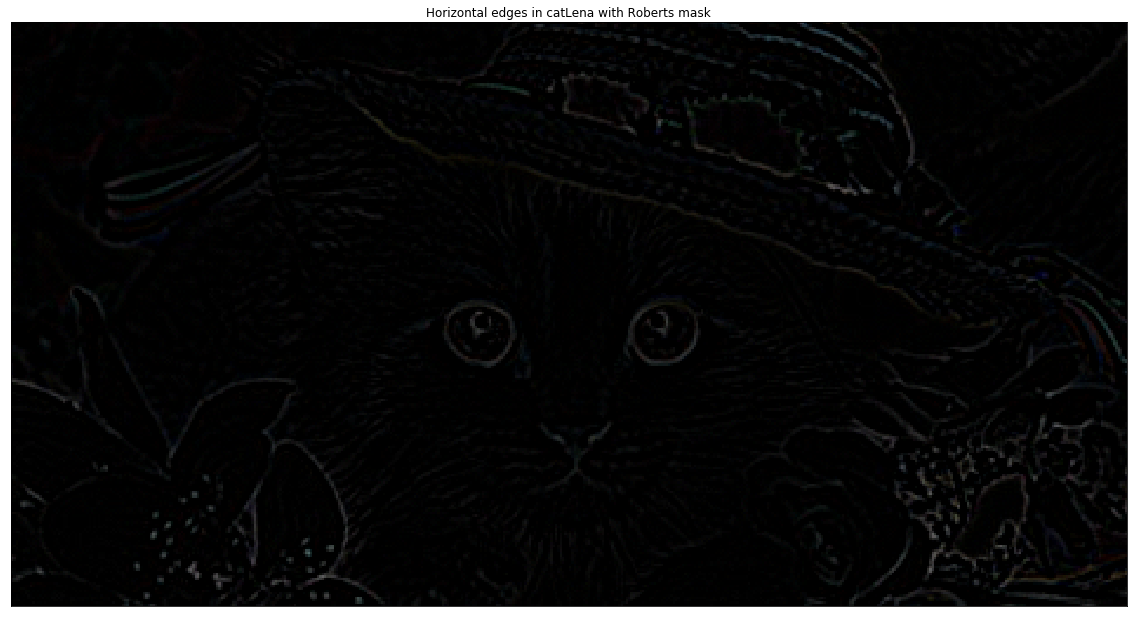

In [69]:
plt.figure(figsize=(44,24))
plt.subplot(121), plt.imshow(cv2.cvtColor(B3Lena_R_y, cv2.COLOR_BGR2RGB)),plt.title('Horizontal edges in catLena with Roberts mask')
plt.xticks([]), plt.yticks([])

11. (10 points) Create the gradient image

In [70]:
lap = cv2.Laplacian(OrigCLena,cv2.CV_64F,ksize=3) 
lap = np.uint8(np.absolute(lap))

In [71]:
sobelx= cv2.Sobel(OrigCLena,0, dx=1,dy=0)
sobelx= np.uint8(np.absolute(sobelx))

In [72]:
sobely= cv2.Sobel(OrigCLena,0, dx=0,dy=1)
sobely = np.uint8(np.absolute(sobely))

Text(0.5, 1.0, 'SP_median_7x7')

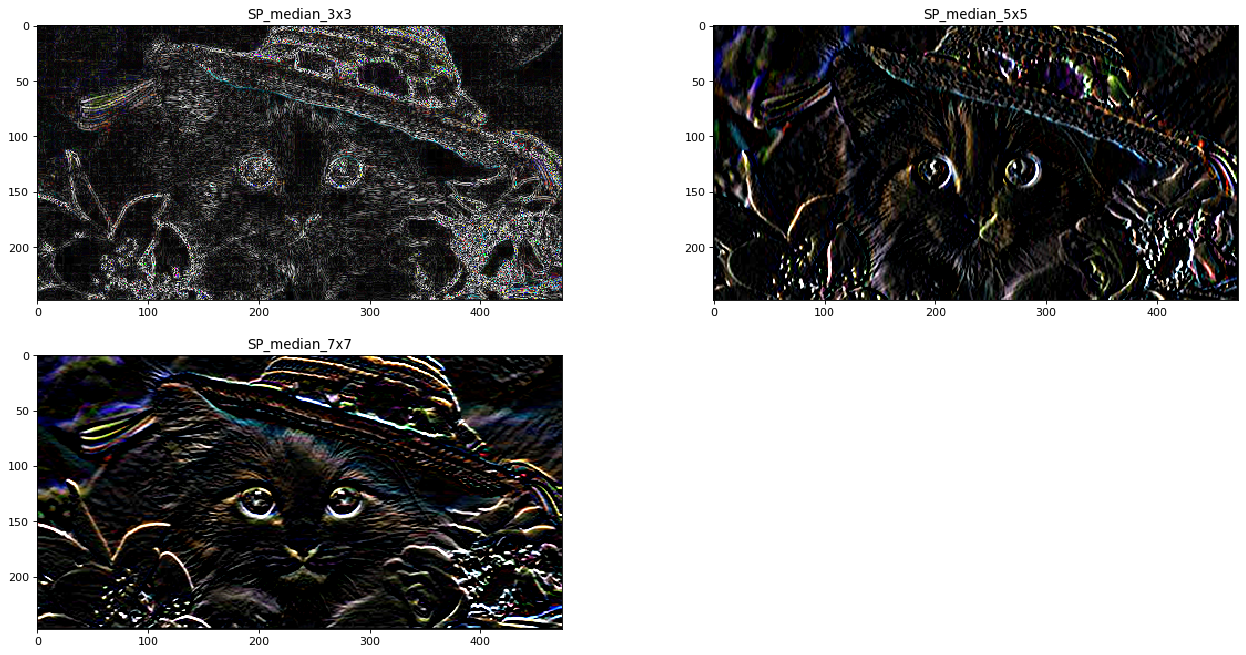

In [73]:
plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='k')
#plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.imshow(lap)
plt.gca().set_title('SP_median_3x3')

plt.subplot(2,2,2)
plt.imshow(sobelx)
plt.gca().set_title('SP_median_5x5')

plt.subplot(2,2,3)
plt.imshow(sobely)
plt.gca().set_title('SP_median_7x7')



D:\Anaconda\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


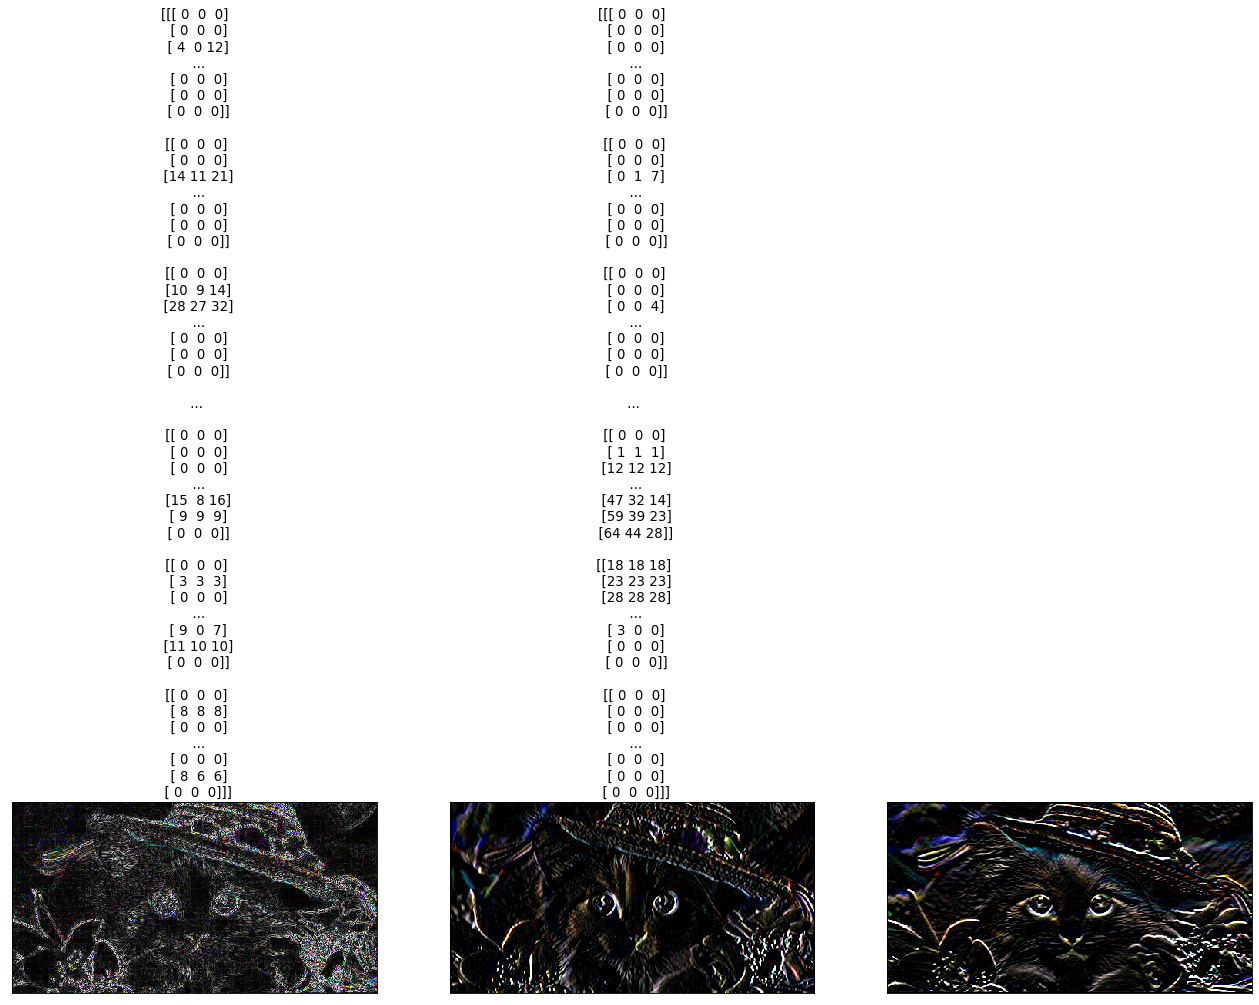

In [74]:
results = [lap,sobelx,sobely]
plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='k')
images =["Gradient Image","Gradient In X direction","Gradient In Y direction"]
for i in range(3):
    plt.title(results[i])
    plt.subplot(1,3,i+1)
    plt.imshow(results[i],"plasma")
    plt.xticks([])
    plt.yticks([])
plt.show()

https://www.codespeedy.com/find-the-gradient-of-an-image-in-python/ 

I took the code from here and according to this source gradient is change of intensity of image colors in X, Y or both directions.

12. Create the Sobel edge detection masks. Note that inside the Sobel masks there is already the
smoothing kernel, therefore it must be applied directly to the original image

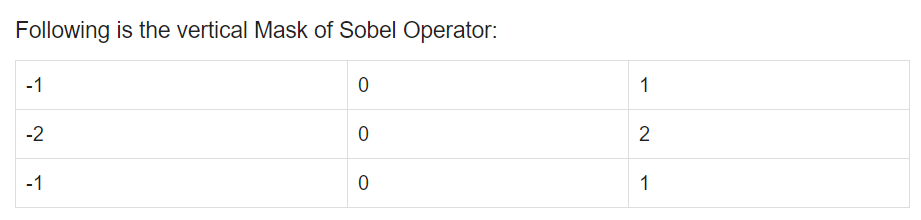

In [75]:
Sobel_V = np.array([[-1,0,1],
               [-2,0,2],
               [-1,0,1]])
print(Sobel_V)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


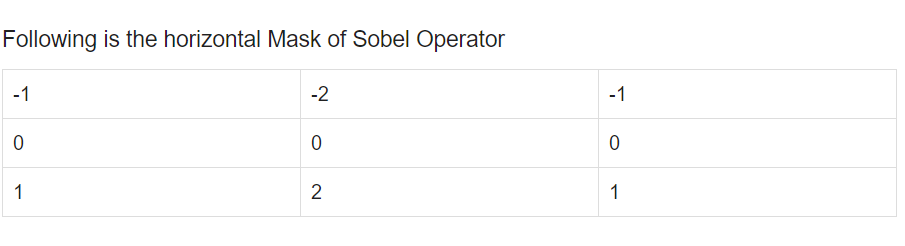

In [76]:
Sobel_H = np.array([[-1,-2,-1],
               [0,0,0],
               [1,2,1]])
print(Sobel_H)

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


https://www.tutorialspoint.com/dip/sobel_operator.htm

I took Sobel masks from tutorialspoint but there is some differences about this masks in internet. I don't know which one true I choosed them and implemented them.

13. (5 points) Create and show horizontal and vertical edges in catLena with Sobel mask

In [77]:
Sobel_Vertical = cv2.Sobel(OrigCLena,-1,1,0,Sobel_V)
Sobel_Horizontal = cv2.Sobel(OrigCLena,-1,0,1,Sobel_H)

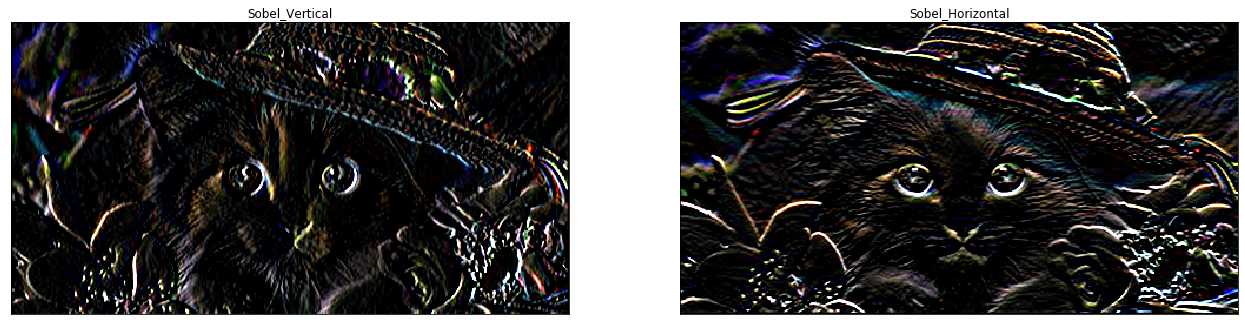

In [78]:
plt.figure(figsize=(22,12))
plt.subplot(121), plt.imshow(Sobel_Vertical, cmap = 'gray'),plt.title('Sobel_Vertical')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(Sobel_Horizontal, cmap = 'gray'),plt.title('Sobel_Horizontal')
plt.xticks([]), plt.yticks([])
plt.show()


Vertical and Horizontal Sobel masks applied to original image. Vertical picture is showing vertical edges, horizontal is showing horizontal edges.

14. (5 points) Create and show ‘The Sobel operator applied to catLena’

In [79]:
Sobel = Sobel_Vertical + Sobel_Horizontal

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

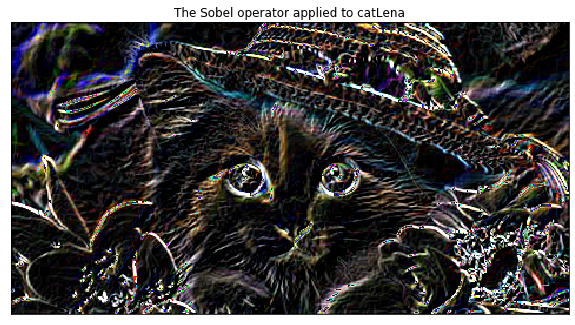

In [80]:
plt.figure(figsize=(22,12))
plt.subplot(121), plt.imshow(Sobel),plt.title('The Sobel operator applied to catLena')
plt.xticks([]), plt.yticks([])

Sobel operator applied picture will be Vertical + Horizontal. I sum up these two values and I showed the picture.

15. Create the Prewitt edge detection masks

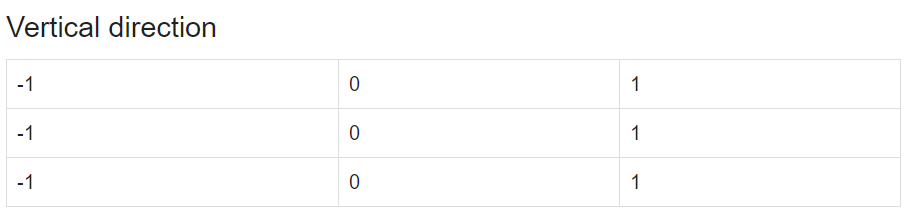

In [81]:
Prewitt_V = np.array([[-1,0,1],
               [-1,0,1],
               [-1,0,1]])
print(Prewitt_V)

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


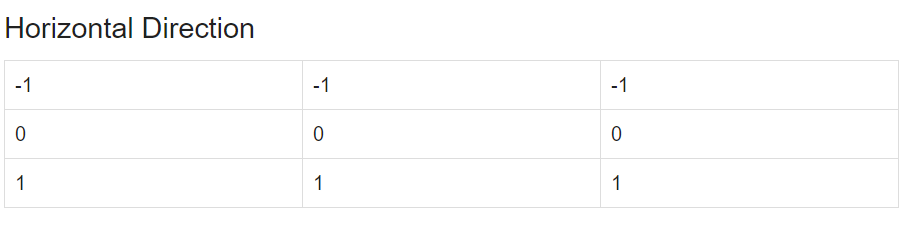

In [82]:
Prewitt_H = np.array([[-1,-1,-1],
               [0,0,0],
               [1,1,1]])
print(Prewitt_H)

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


https://www.tutorialspoint.com/dip/prewitt_operator.htm

I took this values from tutorialspoint but there is some different values on the internet.

16. (5 points) Create and show horizontal and vertical edges in catLena with Prewitt mask

In [83]:
Prewitt_Vertical = cv2.filter2D(OrigCLena,-1,Prewitt_V)
Prewitt_Horizontal = cv2.filter2D(OrigCLena,-1,Prewitt_H)

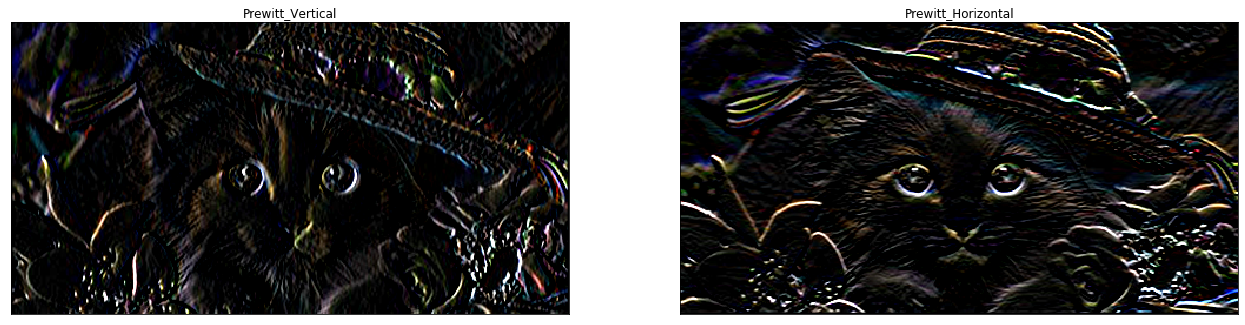

In [84]:
plt.figure(figsize=(22,12))
plt.subplot(121), plt.imshow(Prewitt_Vertical),plt.title('Prewitt_Vertical')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(Prewitt_Horizontal),plt.title('Prewitt_Horizontal')
plt.xticks([]), plt.yticks([])
plt.show()

I calculated prewitt vertical and horizontal values above.

17. (5 points) Create and show ‘The Prewitt operator applied to catLena’

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

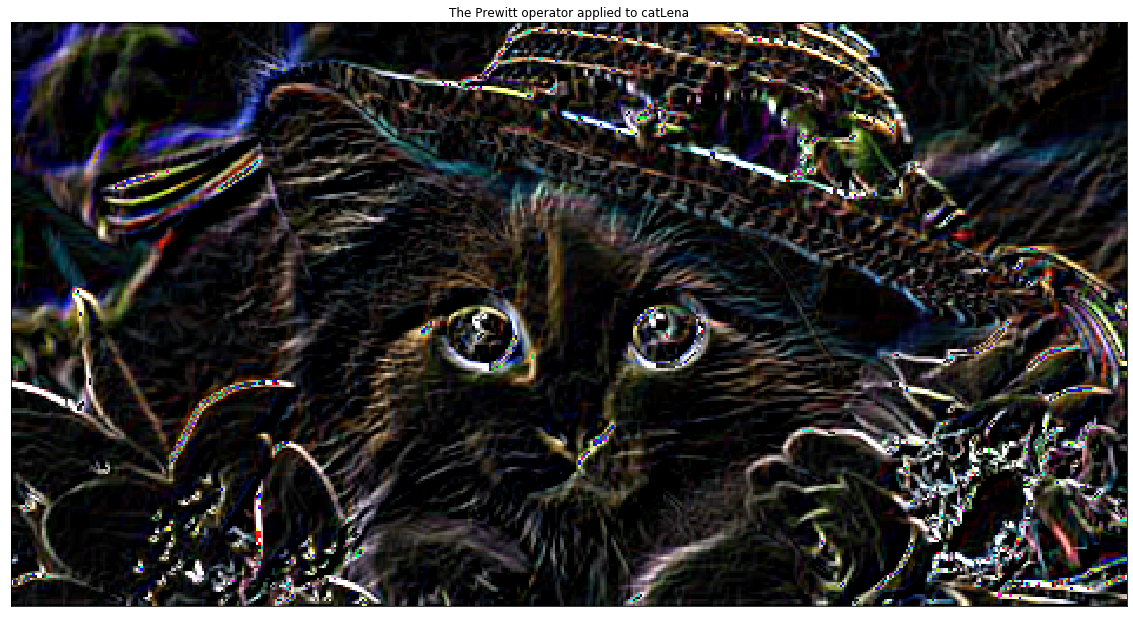

In [85]:
Prewitt_image = Prewitt_Vertical + Prewitt_Horizontal

plt.figure(figsize=(44,24))
plt.subplot(121), plt.imshow(Prewitt_image),plt.title('The Prewitt operator applied to catLena')
plt.xticks([]), plt.yticks([])

Prewitt image wil be sum of Vertical and Horizontal.